<a href="https://colab.research.google.com/github/shivamswarnkar/Image-Generator/blob/master/dcgan_colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Git Repo

In [ ]:
!git clone https://github.com/shivamswarnkar/Image-Generator.git gan
%cd gan

# Download Dataset
### I'll show an example by downloading the kaggle dataset of landmark images

In [ ]:
# Download dataset
!wget 'https://storage.googleapis.com/kaggle-data-sets/23421/29962/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1573501226&Signature=rpVKKYfPn9mTz6sOgMA0UtmnRv1m7peGxNNEjGaRJglT9Gz2cbh%2BDUaUuR5XDO6hY1QdtbZ9cX1Jq61FNJ3VuSuOYREQZVZvtEPWyFL6f9%2Fv7jDWh2MjhoaISZTAqg7ppyt%2B1LTERcSlPpSkug3hXCeKbytSaMSPCrZuqS8EBS9oLZyLgwlv5UQI5Rlgf5GOKtWxEQhOR7QC7C9dED0idCj8xOvrVYqmj8HltsFUyKcydX8J54c6XVFdvE5S2VNA27QWkFqaWmo7EYil%2BQ6QfhttdOV%2Fxy%2BJflFdqsb8hBjgNOd5cjtKKrH4in0Mo1gRoO4dIDRdiDAcDGA0cG90Ng%3D%3D&response-content-disposition=attachment%3B+filename%3Dlandmark-recognition.zip'

In [ ]:
# rename downloaded zip file
! mv 'archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1573501226&Signature=rpVKKYfPn9mTz6sOgMA0UtmnRv1m7peGxNNEjGaRJglT9Gz2cbh+DUaUuR5XDO6hY1QdtbZ9cX1Jq61FNJ3VuSuOYREQZVZvtEPWyFL6f9%2Fv7jDWh2MjhoaISZTAqg7ppyt' 'landmark.zip'

In [7]:
!ls 

checkpoints  demo_imgs	    generator	  output	     train.py
data	     discriminator  landmark.zip  pretrained_models  utils
DCGAN	     generate.py    LICENSE	  README.md


In [ ]:
# setup dataroot
!mkdir data/landmark

In [ ]:
# unzip zip file
!unzip -qq landmark.zip -d data/landmark

In [15]:
!ls data/landmark

images	Images	labels.csv  train.csv


In [ ]:
# delete unecessary data
!rm -r data/landmark/Images
!rm data/landmark/labels.csv
!rm data/landmark/train.csv

In [ ]:
# setup dir such data images are at data/landmark/Images
!mv data/landmark/images/Images data/landmark/Images

In [ ]:
!rm -r data/landmark/images

# Training from Scratch Using Image Generator

In [22]:
!python train.py --dataroot data/landmark/ --num_epochs 5

Starting Training Loop....
[1/5][1/172]  						Loss_D:2.1786  						Loss_G:2.9364  						D(x):0.2811  						D(G(z)):0.4167/0.0762
Made a New Checkpoint for 1
[2/5][1/172]  						Loss_D:1.2398  						Loss_G:5.2131  						D(x):0.4378  						D(G(z)):0.0216/0.0178
[3/5][1/172]  						Loss_D:0.3953  						Loss_G:3.1924  						D(x):0.7902  						D(G(z)):0.1083/0.0526
[4/5][1/172]  						Loss_D:1.2105  						Loss_G:6.0249  						D(x):0.8710  						D(G(z)):0.5656/0.0053
[5/5][1/172]  						Loss_D:2.1796  						Loss_G:2.6940  						D(x):0.2551  						D(G(z)):0.0161/0.1598


# Generate Images from Trained Generator

In [ ]:
# generate sample images; by default checkpoints are made as checkpoints/netG.pth
!python generate.py --netG checkpoints/netG.pth

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

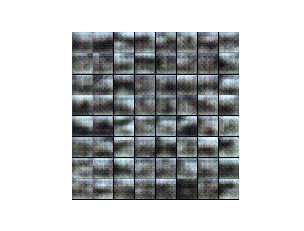

In [28]:
output = Image.open('output/fake.png')
plt.imshow(output)
plt.axis("off")
plt.show()

# Resuming Training

In [29]:
!python train.py --dataroot data/landmark/ --netG checkpoints/netG.pth --netD checkpoints/netD.pth --num_epochs 50

Starting Training Loop....
[1/50][1/172]  						Loss_D:1.6958  						Loss_G:1.0552  						D(x):0.3280  						D(G(z)):0.0133/0.4190
Made a New Checkpoint for 1
[2/50][1/172]  						Loss_D:1.3068  						Loss_G:5.6475  						D(x):0.8815  						D(G(z)):0.6138/0.0122
[3/50][1/172]  						Loss_D:1.0679  						Loss_G:3.6397  						D(x):0.6909  						D(G(z)):0.3882/0.0438
[4/50][1/172]  						Loss_D:0.6478  						Loss_G:3.7633  						D(x):0.8009  						D(G(z)):0.2861/0.0453
[5/50][1/172]  						Loss_D:1.9187  						Loss_G:0.7784  						D(x):0.3268  						D(G(z)):0.1030/0.6067
[6/50][1/172]  						Loss_D:2.6840  						Loss_G:8.9228  						D(x):0.9346  						D(G(z)):0.8293/0.0027
Made a New Checkpoint for 6
[7/50][1/172]  						Loss_D:0.4688  						Loss_G:3.2597  						D(x):0.7554  						D(G(z)):0.0834/0.0966
[8/50][1/172]  						Loss_D:0.6086  						Loss_G:3.0891  						D(x):0.7561  						D(G(z)):0.2124/0.0680
[9/50][1/172]  						Loss_D:3.0621  						Loss_G:6.9352  						D(x):0.9840  						D(G

# Generate Images from newly trained model

In [ ]:
!python generate.py --netG checkpoints/netG.pth

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

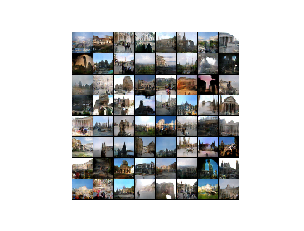

In [32]:
output = Image.open('output/fake.png')
plt.imshow(output)
plt.axis("off")
plt.show()

# Save model to Google Drive

In [33]:
# By default, mdoels are saved in checkpoints dir. Once you close cloab, it'll remove all the data. 
# so for safety, you should move/download your importan files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp checkpoints/netG.pth '/content/drive/My Drive/landmark_netG.pth'
!cp checkpoints/netD.pth '/content/drive/My Drive/landmark_netD.pth'